# Day 10: Adapter Array

Patched into the aircraft's data port, you discover weather forecasts of a massive tropical storm. Before you can figure out whether it will impact your vacation plans, however, your device suddenly turns off!

Its battery is dead.

You'll need to plug it in. There's only one problem: the charging outlet near your seat produces the wrong number of jolts. Always prepared, you make a list of all of the joltage adapters in your bag.

## Puzzle 1

Each of your joltage adapters is rated for a specific output joltage (your puzzle input). Any given adapter can take an input 1, 2, or 3 jolts lower than its rating and still produce its rated output joltage.

In addition, your device has a built-in joltage adapter rated for 3 jolts higher than the highest-rated adapter in your bag. (If your adapter list were 3, 9, and 6, your device's built-in adapter would be rated for 12 jolts.)

Treat the charging outlet near your seat as having an effective joltage rating of 0.

Since you have some time to kill, you might as well test all of your adapters. Wouldn't want to get to your resort and realize you can't even charge your device!

If you use every adapter in your bag at once, what is the distribution of joltage differences between the charging outlet, the adapters, and your device?

For example, suppose that in your bag, you have adapters with the following joltage ratings:

```text
16
10
15
5
1
11
7
19
6
12
4
```

With these adapters, your device's built-in joltage adapter would be rated for 19 + 3 = 22 jolts, 3 higher than the highest-rated adapter.

Because adapters can only connect to a source 1-3 jolts lower than its rating, in order to use every adapter, you'd need to choose them like this:

    The charging outlet has an effective rating of 0 jolts, so the only adapters that could connect to it directly would need to have a joltage rating of 1, 2, or 3 jolts. Of these, only one you have is an adapter rated 1 jolt (difference of 1).
    From your 1-jolt rated adapter, the only choice is your 4-jolt rated adapter (difference of 3).
    From the 4-jolt rated adapter, the adapters rated 5, 6, or 7 are valid choices. However, in order to not skip any adapters, you have to pick the adapter rated 5 jolts (difference of 1).
    Similarly, the next choices would need to be the adapter rated 6 and then the adapter rated 7 (with difference of 1 and 1).
    The only adapter that works with the 7-jolt rated adapter is the one rated 10 jolts (difference of 3).
    From 10, the choices are 11 or 12; choose 11 (difference of 1) and then 12 (difference of 1).
    After 12, only valid adapter has a rating of 15 (difference of 3), then 16 (difference of 1), then 19 (difference of 3).
    Finally, your device's built-in adapter is always 3 higher than the highest adapter, so its rating is 22 jolts (always a difference of 3).

In this example, when using every adapter, there are 7 differences of 1 jolt and 5 differences of 3 jolts.

Here is a larger example:

```text
28
33
18
42
31
14
46
20
48
47
24
23
49
45
19
38
39
11
1
32
25
35
8
17
7
9
4
2
34
10
3
```

In this larger example, in a chain that uses all of the adapters, there are 22 differences of 1 jolt and 10 differences of 3 jolts.

Find a chain that uses all of your adapters to connect the charging outlet to your device's built-in adapter and count the joltage differences between the charging outlet, the adapters, and your device. What is the number of 1-jolt differences multiplied by the number of 3-jolt differences?

In [1]:
# Python imports
from collections import Counter
from itertools import combinations
from pathlib import Path
from typing import List

import networkx as nx

This looks like it might turn into a graph problem but, for now, the challenge seems straightforward enough that we can attack it directly.

The adapters must be arranged from lowest value to highest value. So we load the adapters into a sorted list, for convenience with the `load_adapters()` function.

In [2]:
def load_adapters(fpath: str) -> List[int]:
    """Return a sorted list of adapter values
    
    :param fpath:  path to input data file
    """
    with Path(fpath).open("r") as ifh:
        adapters = sorted([int(_) for _ in ifh.readlines()])
    return adapters

Now we can use a Python `Counter` to count the differences in value between consecutive adapter values - not forgetting to add the 0 jolt source, and the joltage value for the device, with the `count_differences()` function.

In [3]:
def count_differences(adapters: List[int]) -> Counter:
    """Return Counter of differences between consecutive adapter values
    
    :param adapters:  sorted list of adapter values
    """
    adapters = [0] + adapters + [max(adapters) + 3]
    diffs = [adapters[idx + 1] - adapters[idx] for idx in range(len(adapters) - 1)]
    return Counter(diffs)

Checking we load adapters correctly.

In [4]:
adapters = load_adapters("day10_test1.txt")
adapters

[1, 4, 5, 6, 7, 10, 11, 12, 15, 16, 19]

Checking we count differences correctly.

In [5]:
diffs = count_differences(adapters)
diffs

Counter({1: 7, 3: 5})

In [6]:
adapters = load_adapters("day10_test2.txt")
diffs = count_differences(adapters)
diffs

Counter({1: 22, 3: 10})

Now we can multiply the counts for the real puzzle.

In [7]:
adapters = load_adapters("day10_data.txt")
diffs = count_differences(adapters)
diffs[1] * diffs[3]

2240

## Puzzle 2

To completely determine whether you have enough adapters, you'll need to figure out how many different ways they can be arranged. Every arrangement needs to connect the charging outlet to your device. The previous rules about when adapters can successfully connect still apply.

The first example above (the one that starts with 16, 10, 15) supports the following arrangements:

```text
(0), 1, 4, 5, 6, 7, 10, 11, 12, 15, 16, 19, (22)
(0), 1, 4, 5, 6, 7, 10, 12, 15, 16, 19, (22)
(0), 1, 4, 5, 7, 10, 11, 12, 15, 16, 19, (22)
(0), 1, 4, 5, 7, 10, 12, 15, 16, 19, (22)
(0), 1, 4, 6, 7, 10, 11, 12, 15, 16, 19, (22)
(0), 1, 4, 6, 7, 10, 12, 15, 16, 19, (22)
(0), 1, 4, 7, 10, 11, 12, 15, 16, 19, (22)
(0), 1, 4, 7, 10, 12, 15, 16, 19, (22)
```

(The charging outlet and your device's built-in adapter are shown in parentheses.) Given the adapters from the first example, the total number of arrangements that connect the charging outlet to your device is 8.

The second example above (the one that starts with 28, 33, 18) has many arrangements. Here are a few:

```text
(0), 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31,
32, 33, 34, 35, 38, 39, 42, 45, 46, 47, 48, 49, (52)

(0), 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31,
32, 33, 34, 35, 38, 39, 42, 45, 46, 47, 49, (52)

(0), 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31,
32, 33, 34, 35, 38, 39, 42, 45, 46, 48, 49, (52)

(0), 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31,
32, 33, 34, 35, 38, 39, 42, 45, 46, 49, (52)

(0), 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31,
32, 33, 34, 35, 38, 39, 42, 45, 47, 48, 49, (52)

(0), 3, 4, 7, 10, 11, 14, 17, 20, 23, 25, 28, 31, 34, 35, 38, 39, 42, 45,
46, 48, 49, (52)

(0), 3, 4, 7, 10, 11, 14, 17, 20, 23, 25, 28, 31, 34, 35, 38, 39, 42, 45,
46, 49, (52)

(0), 3, 4, 7, 10, 11, 14, 17, 20, 23, 25, 28, 31, 34, 35, 38, 39, 42, 45,
47, 48, 49, (52)

(0), 3, 4, 7, 10, 11, 14, 17, 20, 23, 25, 28, 31, 34, 35, 38, 39, 42, 45,
47, 49, (52)

(0), 3, 4, 7, 10, 11, 14, 17, 20, 23, 25, 28, 31, 34, 35, 38, 39, 42, 45,
48, 49, (52)
```

In total, this set of adapters can connect the charging outlet to your device in 19208 distinct arrangements.

You glance back down at your bag and try to remember why you brought so many adapters; there must be more than a trillion valid ways to arrange them! Surely, there must be an efficient way to count the arrangements.

What is the total number of distinct ways you can arrange the adapters to connect the charging outlet to your device?

This is now clearly a graph problem: what is the count of valid paths through the adapters from the outlet (joltage zero) to the device?

We load the adapters as a directed graph, where each node is an adapter (with labelled joltage) and each edge represents a valid connection between adapters (joltage difference is between 1 and 3, inclusive), using `load_adapter_graph()`

In [8]:
def load_adapter_graph(fpath: str) -> nx.DiGraph:
    """Return directed graph representing valid adapter connections
    
    :param fpath:  path to input data file
    """
    adapters = nx.DiGraph()
    adapters.add_node(0)

    with Path(fpath).open("r") as ifh:
        adaptervals = [0] + sorted([int(_) for _ in ifh.readlines()])
#         print(adaptervals)
        for val in adaptervals:
            adapters.add_node(val)
        for u, v in combinations(adapters.nodes, 2):
            diff = max((u, v)) - min((u, v))
            if 0 < diff <= 3 and (u, v) not in adapters.edges():
                adapters.add_edge(u, v, weight=diff)
    return adapters

As a check, we can count the differences of the edges as before with `count_graph_differences()`.

In [9]:
def count_graph_differences(adapters: nx.DiGraph) -> Counter:
    """Return Counter of differences between consecutive adapter values
    
    :param adapters:  directed graph of valid adapter connections
    """
    diffs = [weight for (u, v, weight) in adapters.edges(data="weight")]
    return Counter(diffs)

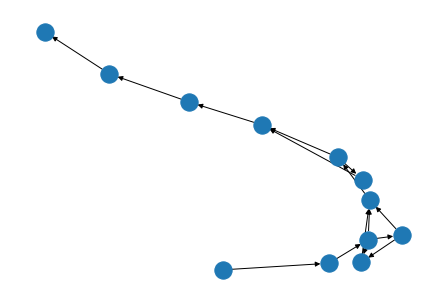

In [10]:
adapters = load_adapter_graph("day10_test1.txt")
nx.draw(adapters)

In [11]:
count_graph_differences(adapters)

Counter({1: 7, 3: 5, 2: 3})

In principle we should be able to use the `networkx` function `all_simple_paths()` to enumerate all paths from the outlet to the device.

In [12]:
adapters = load_adapter_graph("day10_test1.txt")
sum(1 for _ in nx.all_simple_paths(adapters, 0, max(adapters.nodes)))

8

In [13]:
adapters = load_adapter_graph("day10_test2.txt")
sum(1 for _ in nx.all_simple_paths(adapters, 0, max(adapters.nodes)))

19208

But this is muc, much too slow to work for the real puzzle.

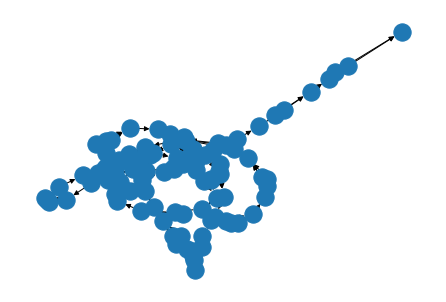

In [14]:
adapters = load_adapter_graph("day10_data.txt")
nx.draw_spring(adapters)

In [15]:
# sum(1 for _ in tqdm(nx.all_simple_paths(adapters, 0, max(adapters.nodes))))

We adapt our "bagception" solution from day 7.

The key is to recognise that the number of paths from any node in the graph to the device is the sum of the number of paths from all immediately downstream nodes in the graph to the device.

So if node 10 connects to nodes 12 and 13, the number of paths from node 10 is the sum of (number of paths from node 12) + (number of paths from node 13).

We use the same logic as in "bagception", progressing from the graph termini (initially one terminus: the device) to the graph source (the outlet, node 0). At each step we sum the number of paths to the device from the downstream nodes that the current node is connected to.

One difference from "bagception" is that we don't want to remove nodes or edges from the adapter graph when counting, so we create a copy of the graph for our deletions. A more elegant version of this would mark nodes in the graph as "visited" rather than deleting them.

In [16]:
def count_paths(adapters: nx.DiGraph) -> int:
    """Return the number of paths from outlet to device.
    
    :param adapters:  directed graph of valid adapter connections
    """
    # initial set of terminal nodes
    gcopy = adapters.copy()
    termini = [node for node, deg in gcopy.out_degree if deg == 0]

    while len(termini):  # loop while there are still termini
        curnode = termini.pop(0)  # pop a terminus off the left end of the list
        paths_out = adapters.out_edges(curnode)
        if len(paths_out) == 0:  # this is the device
            adapters.add_node(curnode, paths_to_device=1)
        else:
            paths_to_device = 0
            for u, v in paths_out:
                paths_to_device += adapters.nodes[v]["paths_to_device"]
            adapters.add_node(curnode, paths_to_device=paths_to_device)
        
        if curnode == 0:  # have we hit the outlet?
            return nx.get_node_attributes(adapters, "paths_to_device")[0]

        gcopy.remove_node(curnode)  # remove the terminus we were working with
        
        # Update the list with any new termini
        termini.extend([node for node, deg in gcopy.out_degree if deg == 0 and node not in termini])
        
    return 0  # Only happens if we don't find our query node

Solving for the example data.

In [17]:
adapters = load_adapter_graph("day10_test1.txt")
count_paths(adapters)

8

In [18]:
adapters = load_adapter_graph("day10_test2.txt")
count_paths(adapters)

19208

Solving for the real puzzle.

In [19]:
adapters = load_adapter_graph("day10_data.txt")
count_paths(adapters)

99214346656768